# Estudio del movimiento de un paracaidista

## Introducción

El paracaidismo es la técnica de lanzamiento de seres humanos u objetos desde cierta altura, en donde se usa un paracaídas para amortiguar el impacto del aterrizazje.

A lo largo de la historia el ser humano ha intentado descender de las alturas usando un elemento como el paracaídas; el primer intento registrado de lanzarse en paracaídas fue llevado a cabo por Abbás Ibn Firnás, en el año 852, en Córdoba (España), donde el sujeto en cuestión sufrió varias heridas en el aterrizaje. En años posteriores se siguió realizando esta práctica con múltiples intentos fallidos, no fue hasta 1793 donde el aeronauta francés Jean Pierre Blanchard aseguró haber realizado el primer descenso humano con éxito utilizando un paracaídas.

En años posteriores a este éxito, el paracaídas se convirtió en un elemento habitual del equipamiento de los pasajeros en los globos aerostáticos y tras la Primera Guerra Mundial dichos implementos fueron adoptados como sistemas de seguridad para los pilotos y los pasajeros de los aviones. Ya en la Segunda Guerra Mundial los ejércitos generalizaron el uso del paracaídas equipando a tropas especializadas que eran lanzadas en zonas estratégicas. A día de hoy, el paracaidismo se ha convertido en una práctica muy popular y que muchas personas realizan diariamente bien sea por fines de ocio o deportivos.

De esta forma, en el presente notebook se busca dilucidar el movimiento de un paracaidista, las particularidades de su trayectoria, su velocidad límite y máxima y demás parámetros físicos de interés, dadas ciertas condiciones iniciales.

## Desarrollo

El desarrollo de este interesante movimiento se hará paso a paso, añadiendo cada vez más complejidad al problema; de modo que, en primer lugar, se hará el estudio para una atmósfera uniforme y se seguirá con un caso mucho más práctico como el de una atmósfera no uniforme, en donde a su vez, se detallarán ciertos elementos con el fin de hacer mucho más preciso el estudio.

In [372]:
# Librerias usadas en el trabajo
import math as mt
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import newton

### Atmósfera uniforme

En el momento en el que el paracaidista es lanzado desde el avión es posible diferenciar dos movimientos, el primero de ellos es la caída libre antes de la apertura del paracaídas y el segundo es el movimiento cuando se ha abierto el paracaídas.

#### Caída libre

En esta primera parte de la trayectoria, la única fuerza que actúa sobre él es el peso, en donde las ecuaciones de movimiento serán:

$$ \frac{\operatorname{d}\boldsymbol{x}}{\operatorname{d}t} = \boldsymbol{v} $$
$$ \frac{\operatorname{d}\boldsymbol{v}}{\operatorname{d}t} = -g $$

Así,
\begin{align}
\frac{\operatorname{d}}{\operatorname{d}t} U=\begin{pmatrix}v\\
 -g \end{pmatrix},
\end{align}
donde
\begin{align}
 U=\begin{pmatrix}x\\
v \end{pmatrix}.
\end{align}

In [373]:
# Matriz que será solucionada para el primer movimiento
def du_dt_u1(U,t,g=9.8):
    x,v = U
    dudt_u1 = [v,-g]
    return dudt_u1

#### Movimiento tras la apertura del paracaidas

La otra parte del movimiento de un paracaídista está caracterizado porque éste ya no sólo estará sometido a la fuerza de su peso sino también a una fuerza de rozamiento proporcional al cuadrado de la velocidad, cuya constante de proporcionalidad está dada por $$ k = \frac{\rho A \delta}{2} $$
donde $\rho$ es la densidad del aire, $A$ es área de la sección transversal frontal que se expone al aire y $\delta$ es un coeficiente de arrastre que depende de la forma del objeto.

Nótese que la densidad del aire varía con la altura pero para este primer cálculo, puesto que trabajamos con una atmósfera constante, se usará el valor de esta densidad al nivel del mar, que es de 1.29 $kg/m^3$.

Por otro lado, el coeficiente $\delta$ para un paracaidista se tomará como un promedio de los valores dados para dos formas, un disco circular y una esfera, pues el paracaídista es más aerodinámico que un disco pero menos que una esfera. Así, como $\delta$ toma un valor aproximado de 1.2 y 0.4 para un disco y una esfera respectivamente, el coeficiente de arrastre para un paracaídista es aproximadamente de 0.8

De este modo, finalmente, las ecuaciones de movimiento para esta segunda trayectoria son:

$$ \frac{\operatorname{d}\boldsymbol{x}}{\operatorname{d}t} = \boldsymbol{v} $$
$$ \frac{\operatorname{d}\boldsymbol{v}}{\operatorname{d}t} = -g + \frac{k}{m}\boldsymbol{v}^2 $$

Así,
\begin{align}
\frac{\operatorname{d}}{\operatorname{d}t} U=\begin{pmatrix}v\\
 -g + \dfrac{k}{m}v^2 \end{pmatrix},
\end{align}
donde
\begin{align}
 U=\begin{pmatrix}x\\
v \end{pmatrix}.
\end{align}

In [374]:
# Matriz que será solucionada para el segundo movimiento
def du_dt_u2(U,t,ρ0=1.29,A=0.6,δ=0.8,m=72,g=9.8):
    k = (ρ0*A*δ)/2
    x,v = U
    dudt_u2 = [v,-g+(k/m)*v**2]
    return dudt_u2

Para ilustrar el movimiento en este modelo simple dado para una atmósfera uniforme se tomará $m = 72$ $kg$ y $A = 0.6$ $m^2$, lanzándose desde una altura de $2000$ $m$ y abriendo el paracaídas inmediatamente, por lo que sólo se estudiará la segunda parte del movimiento.

In [375]:
# Condiciones iniciales
U0_u2 = [2000,0]

# Tiempo para el movimiento
t2 = np.linspace(0,50,50)

In [377]:
# Solución del segundo sistema
U_u2 = odeint(du_dt_u2,U0_u,t2)

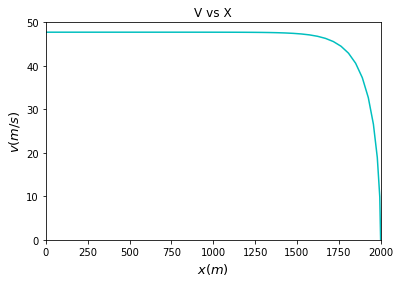

In [378]:
# Graficación
plt.plot(U_u2[:,0],-U_u2[:,1],'c-')
plt.title('V vs X')
plt.xlim(0,2000)
plt.ylim(0,50)
plt.xlabel('$x(m)$',size=13)
plt.ylabel('$v(m/s)$',size=13)
plt.show()

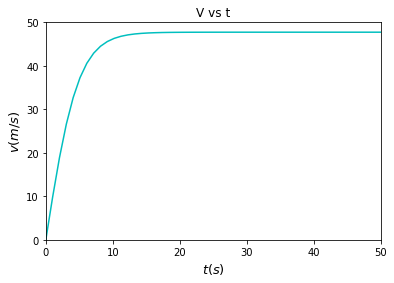

In [379]:
# Graficación
plt.plot(t2,-U_u2[:,1],'c-')
plt.title('V vs t')
plt.xlim(0,50)
plt.ylim(0,50)
plt.xlabel('$t(s)$',size=13)
plt.ylabel('$v(m/s)$',size=13)
plt.show()

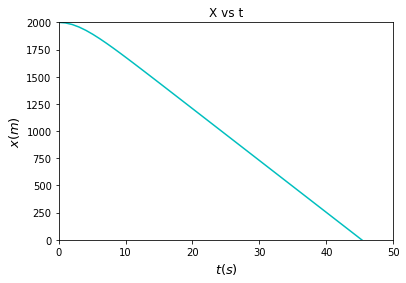

In [268]:
# Graficación
plt.plot(t2,U_u2[:,0],'c-')
plt.title('X vs t')
plt.xlim(0,50)
plt.ylim(0,2000)
plt.xlabel('$t(s)$',size=13)
plt.ylabel('$x(m)$',size=13)
plt.show()

Explicado esto, nótese que para este movimiento, con atmósfera uniforme, hay una velocidad límite, la cual corresponde al momento en que el peso es igual a la fuerza de rozamiento, esto es, cuando la aceleración es cero. En estos momentos se tiene la siguiente ecuación:

$$ -mg + k\boldsymbol{v}^2 = 0$$

de donde $$\boldsymbol{v_l} = \sqrt{\frac{mg}{k}}$$

por lo que esta velocidad límite es independiente de la velocidad del paracaidista en el momento de abrir el paracaídas, de forma que para el ejemplo anterior con la configuración inicial, donde determinamos un valor de $m$, $g$ y $k$, el paracaidista siempre tendrá la misma velocidad límite

In [380]:
# Definición de condiciones iniciales aleatorias
n = 100
xi = np.random.uniform(1500,2500,n)
vi = np.random.uniform(0,10,n)

t_ua = np.linspace(0,50,50) # Damos valores al parametro

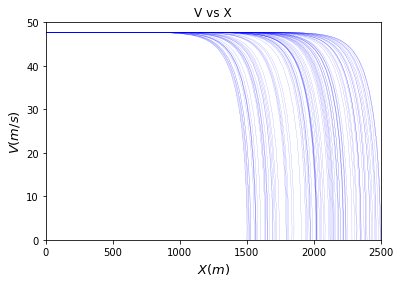

In [381]:
# Cálculo de x,v en las distintas condiciones iniciales
for x,v in zip(xi,vi):
    U0_ua = [x,v]
    u = odeint(du_dt_u2,U0_ua,t_ua) # Resolvemos el problema para las condiciones iniciales aleatorias
    plt.plot(u[:,0],-u[:,1],c='b',lw=0.1) # Graficamos para cada solución hallada
plt.title('V vs X')
plt.xlim(0,2500)
plt.ylim(0,50)
plt.xlabel('$X(m)$',size=13)
plt.ylabel('$V(m/s)$',size=13)
plt.show()

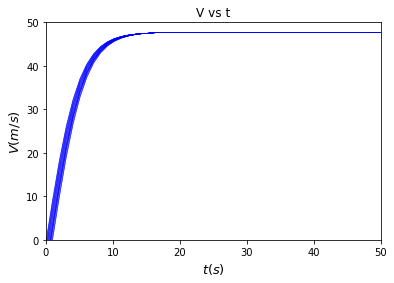

In [382]:
# Cálculo de x,v en las distintas condiciones iniciales
for x,v in zip(xi,vi):
    U0_ua = [x,v]
    u = odeint(du_dt_u2,U0_ua,t_ua) # Resolvemos el problema para las condiciones iniciales aleatorias
    plt.plot(t_ua,-u[:,1],c='b',lw=0.1) # Graficamos para cada solución hallada
plt.title('V vs t')
plt.xlim(0,50)
plt.ylim(0,50)
plt.xlabel('$t(s)$',size=13)
plt.ylabel('$V(m/s)$',size=13)
plt.show()

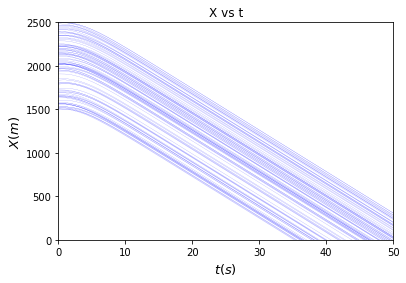

In [383]:
# Cálculo de x,v en las distintas condiciones iniciales
for x,v in zip(xi,vi):
    U0_ua = [x,v]
    u = odeint(du_dt_u2,U0_ua,t_ua) # Resolvemos el problema para las condiciones iniciales aleatorias
    plt.plot(t_ua,u[:,0],c='b',lw=0.1) # Graficamos para cada solución hallada
plt.title('X vs t')
plt.xlim(0,50)
plt.ylim(0,2500)
plt.xlabel('$t(s)$',size=13)
plt.ylabel('$X(m)$',size=13)
plt.show()

Ahora, la velocidad límite para el ejemplo anterior es:

In [384]:
m=72
g=9.8
ρ0=1.29
A=0.6
δ=0.8
k = (ρ0*A*δ)/2
v_l = mt.sqrt(m*g/k)
print("La velocidad límite es:",v_l)

La velocidad límite es: 47.73960376293314


La cual, efectivamente, es aproximadamente igual a la magnitud de la velocidad límite que se obtiene de la gráfica

In [291]:
print(-U_u2[40,1])

47.739598715855074


In [294]:
round(-U_u2[40,1],3) == round(v_l,3)

True

### Atmósfera no uniforme

En una atmósfera no uniforme el movimiento es mucho más complejo que el estudiado anteriormente, pues aquí se tendrá en cuenta la variación de la densidad del aire con la altura.

Se ha de tener en cuenta que en este apartado, con el objetivo de simplificar el problema, simplemente se tendrá en cuenta el movimiento una vez abierto el paracaídas.

#### Variación de la presión

Suponiendo que la atmósfera terrestre es isotérmica, la presión es función de la altitud x, dada por la ley de Laplace, la cual establece que $$P = P_0e^{\frac{-Mgx}{N_AkT}}$$ donde $P_0$ es la presión de la atmósfera al nivel del mar, $M$ = $0.0288$ $kg/mol$ es el peso molecular del aire, $g$ es la aceleración de la gravedad, $k$ = $1.3805 · 10^{-23}$ $J/K$ es la constante de Boltzmann, $T$ es la temperatura de la atmósfera y $N_A$ = $6.0225·10^{23}$ es el número de Avogadro.

De esta forma, al sustituir estos valores en la ecuación anterior se obtiene que $$P = P_0e^{\frac{-1}{7482.2}x}$$

Ahora, si se supone que el aire se comporta como un gas ideal, su densidad es una función de la altura y se comporta de la misma forma que la presión, de modo que la densidad del aire $\rho$ está dada por la siguiente expresión:

 $$\rho = \rho_0e^{\frac{-x}{\lambda}} $$

donde $\rho_0$ = $1.29$ $kg/m^3$ es la densidad del aire al nivel del mar y $\lambda$ = $7482.2$ $m$.

#### Modelo simple

El modelo más sencillo que trabajaremos para la atmósfera no uniforme es contemplando la densidad como se explicó anteriormente.

De esta forma, una vez abierto el paracaídas, las fuerzas que actúan sobre el cuerpo son el peso del mismo y una fuerza de rozamiento proporcional al cuadrado de la velocidad. Así, de manera similar a las ecuaciones de movimiento de la atmósfera uniforme, una vez abierto el paracaídas, se tiene que:

$$ \frac{\operatorname{d}\boldsymbol{x}}{\operatorname{d}t} = \boldsymbol{v} $$
$$ \frac{\operatorname{d}\boldsymbol{v}}{\operatorname{d}t} = -g + \frac{k}{m}\boldsymbol{v}^2 $$

en donde $$ k = \frac{\rho A \delta}{2} $$
y $\rho$ es la densidad del aire que varía con la altura, $A$ es área de la sección transversal frontal y $\delta$ es el coeficiente de arrastre.

Ahora, teniendo en cuenta la expresión para $\rho$ en función de la altura, las ecuaciones de movimiento se pueden convertir en:

$$ \frac{\operatorname{d}\boldsymbol{x}}{\operatorname{d}t} = \boldsymbol{v} $$
$$ \frac{\operatorname{d}\boldsymbol{v}}{\operatorname{d}t} = -g + \frac{k_0}{m}\boldsymbol{v}^2e^{\frac{-\boldsymbol{x}}{\lambda}} $$

donde $k_0$ es la constante de proporcionalidad para un $\rho_0$.

Así,
\begin{align}
\frac{\operatorname{d}}{\operatorname{d}t} U=\begin{pmatrix}v\\
 -g + \dfrac{k_0}{m}v^2e^{\frac{-x}{\lambda}} \end{pmatrix},
\end{align}
donde
\begin{align}
 U=\begin{pmatrix}x\\
v \end{pmatrix}.
\end{align}

Ahora, con el objetivo de ilustrar este movimiento para una atmósfera no uniforme, se estudiará el movimiento de un hombre con una masa de $m$ = $72$ $kg$ y una $A = 0.6$ $m^2$, el cual se lanza desde una altura de $30$ $km$ y abre el paracaídas inmediatamente después de que empieza a caer.

In [385]:
# Matriz que será solucionada para el movimiento
def du_dt(U,t,ρ0=1.29,A=0.6,δ=0.8,m=72,λ=7482.2,g=9.8):
    k_0 = (ρ0*A*δ)/2
    x,v = U
    dudt = [v,-g+k_0/m*(v**2)*np.exp(-x/λ)]
    return dudt

In [386]:
# Condiciones iniciales
U0 = [30000,0]

t = np.linspace(0,300,300) # Damos valores al parametro

In [387]:
# Solución del sistema de ecuaciones diferenciales
U_ = odeint(du_dt,U0,t)

De manera similar al ejemplo proporcionado para una atmósfera uniforme, se pueden realizar diversas gráficas que den luz sobre el movimiento

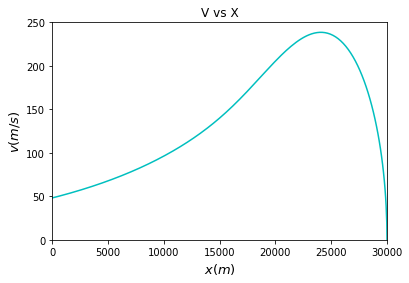

In [388]:
# Graficación
plt.plot(U_[:,0],-U_[:,1],'c-')
plt.title('V vs X')
plt.xlim(0,30000)
plt.ylim(0,250)
plt.xlabel('$x(m)$',size=13)
plt.ylabel('$v(m/s)$',size=13)
plt.show()

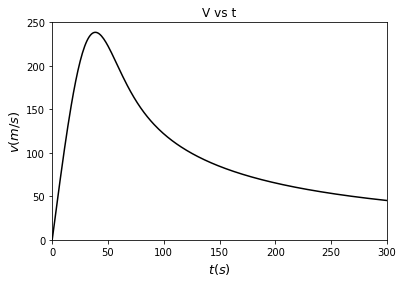

In [389]:
# Graficación
plt.plot(t,-U_[:,1],'k-')
plt.title('V vs t')
plt.xlim(0,300)
plt.ylim(0,250)
plt.xlabel('$t(s)$',size=13)
plt.ylabel('$v(m/s)$',size=13)
plt.show()

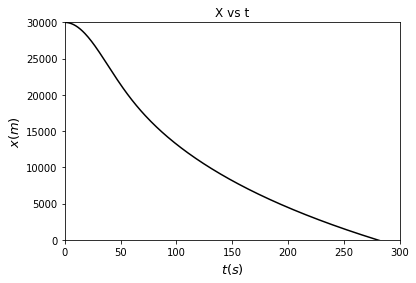

In [390]:
# Graficación
plt.plot(t,U_[:,0],'k-')
plt.title('X vs t')
plt.xlim(0,300)
plt.ylim(0,30000)
plt.xlabel('$t(s)$',size=13)
plt.ylabel('$x(m)$',size=13)
plt.show()

#### Modelo de la NASA

La NASA establece otro modelo de atmósfera, en el cual para diferentes alturas se tienen diferentes presiones (en $KPa$) y temperaturas (en $°C$) de la siguiente forma:

Para $h$ > $25$ $km$: $$T = -131.21 + 0.00299h$$ $$P = 2.488(\frac{T + 273.1}{216.6})^{-11.388}$$

Para $11$ $km$ < $h$ < $25$ $km$: $$T = -56.46$$ $$P = 22.65e^{1.73 - 0.000157h}$$

Para $h$ < $11$ $km$: $$T = 15.04 − 0.00649h$$ $$P = 101.29(\frac{T + 273.1}{288.08})^{5.256}$$

Y finalmente, la densidad del aire, $\rho$ (en $kg/m^3$), es:

$$\rho = \frac{P}{0.2869(T + 273.1)}$$

In [391]:
# Modelo de la densidad en función de la altura de la NASA
def den(h):
  if h<11000:
    T=15.04-0.00649*h;
    p=101.29*((T+273.1)/288.08)**5.256
  elif h>25000:
    T=-131.21+0.00299*h;
    p=2.488*((T+273.1)/216.6)**(-11.388)
  else:
    T=-56.46;
    p=22.65*np.exp(1.73-0.000157*h)
  ρ_n = p/(0.2869*(T+273.1))
  return ρ_n

De esta manera, compararemos la densidad en función de la altura de este nuevo modelo y el anterior:

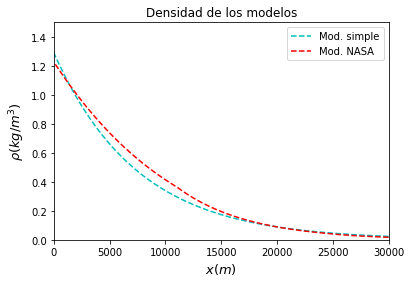

In [392]:
# Definimos parametros necesarios
ρ0=1.29
λ=7482.2

den_vect = np.vectorize(den) #Vectorizamos la función den() para que evalúe varias alturas

# Comparación
plt.plot(U_[:,0],ρ0*np.exp(-U_[:,0]/λ),'c--',label='Mod. simple')
plt.plot(U_[:,0],den_vect(U_[:,0]),'r--',label='Mod. NASA')
plt.title('Densidad de los modelos')
plt.xlim(0,30000)
plt.ylim(0,1.5)
plt.legend(loc="upper right")
plt.xlabel('$x(m)$',size=13)
plt.ylabel('$ρ(kg/m^3)$',size=13)
plt.show()

Es claro que no hay una diferencia significativa entre las densidades, por lo que el modelo simple, haciendo uso de la ley de Laplace, es una buena aproximación al caso real.

#### Modelo con variación de la gravedad

Un último detalle para hacer aún más preciso el cálculo es hacer uso de la variación de la gravedad, pues realmente $g$ no es constante para el movimiento, ya que cambia ligeramente con la altura, pues $$g = G\frac{M}{(R+x)^2}$$ donde $x$ es la altura, $G$ = $6.67·10^{-11}$ es la constante gravitacional, $M$ = $5.98·10^{24}$ es la masa de la Tierra y  $R$ = $6.37·10^{6}$ es el radio de la Tierra.

De modo que las ecuaciones de movimiento quedan de la siguiente forma:

$$ \frac{\operatorname{d}\boldsymbol{x}}{\operatorname{d}t} = \boldsymbol{v} $$
$$ \frac{\operatorname{d}\boldsymbol{v}}{\operatorname{d}t} = -G\frac{M}{(R+\boldsymbol{x})^2} + \frac{A\delta}{2m}\rho(\boldsymbol{x})\boldsymbol{v}^2 $$

Así, para estas nuevas ecuaciones
\begin{align}
\frac{\operatorname{d}}{\operatorname{d}t} U=\begin{pmatrix}v\\
 -G\dfrac{M}{(R+x)^2} + \dfrac{A\delta}{2m}\rho(x)v^2 \end{pmatrix},
\end{align}
donde
\begin{align}
 U=\begin{pmatrix}x\\
v \end{pmatrix}.
\end{align}

Como ya se observó que la aproximación usando la ley de Laplace es relativamente similar al caso real, con el objetivo de no complicar los cálculos computacionales, haremos este último modelo de la variación de la gravedad con dicha ley. 

In [393]:
# Matriz que será solucionada para el movimiento
def du_dt_g(U,t,G=6.67e-11,M=5.98e+24,R=6.37e+6,ρ0=1.29,A=0.6,δ=0.8,m=72,λ=7482.2,g=9.8):
    k_0 = (ρ0*A*δ)/2
    x,v = U
    dudt_g = [v,-G*(M/(R+x)**2)+k_0/m*(v**2)*np.exp(-x/λ)]
    return dudt_g

In [394]:
# Condiciones iniciales
U0_g = [30000,0]

t_g = np.linspace(0,300,300) # Damos valores al parametro

In [395]:
# Solución del sistema de ecuaciones diferenciales
U_g = odeint(du_dt_g,U0_g,t_g)

Y las diversas gráficas que dan luz a este nuevo modelo son:

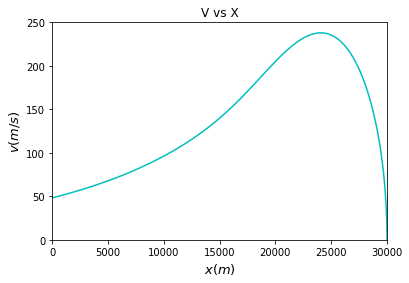

In [396]:
# Graficación
plt.plot(U_g[:,0],-U_g[:,1],'c-')
plt.title('V vs X')
plt.xlim(0,30000)
plt.ylim(0,250)
plt.xlabel('$x(m)$',size=13)
plt.ylabel('$v(m/s)$',size=13)
plt.show()

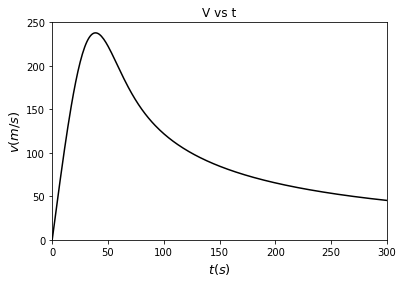

In [397]:
# Graficación
plt.plot(t,-U_g[:,1],'k-')
plt.title('V vs t')
plt.xlim(0,300)
plt.ylim(0,250)
plt.xlabel('$t(s)$',size=13)
plt.ylabel('$v(m/s)$',size=13)
plt.show()

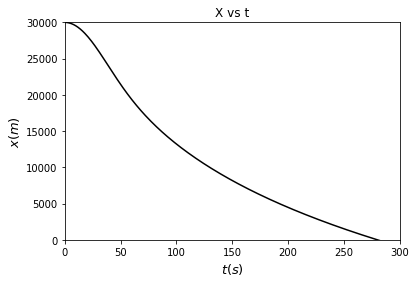

In [398]:
# Graficación
plt.plot(t,U_g[:,0],'k-')
plt.title('X vs t')
plt.xlim(0,300)
plt.ylim(0,30000)
plt.xlabel('$t(s)$',size=13)
plt.ylabel('$x(m)$',size=13)
plt.show()

Una vez mencionado esto, nótese que en el movimiento de un paracaidista cuando el paracaídas se abre inmediatamente después de dejarse caer, es decir, con velocidad inicial nula, hay una velocidad máxima y luego disminuye progresivamente hasta que el cuerpo llega al suelo.

De la segunda ecuación de movimiento para una atmósfera no uniforme de este último modelo se puede obtener que

$$ \boldsymbol{v}\frac{\operatorname{d}\boldsymbol{v}}{\operatorname{d}\boldsymbol{x}} = -G\frac{M}{(R+\boldsymbol{x})^2} + \frac{k_0}{m}\boldsymbol{v}^2e^{\frac{-\boldsymbol{x}}{\lambda}} $$

Es claro que en el momento en que se alcanza la velocidad máxima $\frac{\operatorname{d}\boldsymbol{v}}{\operatorname{d}\boldsymbol{x}}$ = $0$, por lo que

$$ \boldsymbol{v_m}^2 = \boldsymbol{v_l}^2e^{\frac{\boldsymbol{x_m}}{\lambda}} $$

donde $v_m$ es la velocidad máxima, $x_m$ es la altura a la que se produce tal velocidad, $\lambda$ = $7482.2$ $m$ y $v_l$ = $\sqrt{\frac{mGM}{k_0(R+x_m)^2}}$

Ahora, es posible calcular el valor de $x_m$ de dos formas: 
1. Disponer de la solución analítica de $v(x)$ (la cual no se tiene).
2. Calcular la velocidad máxima de la gráfica y a partir de ésta hacer uso de métodos numéricos.

A continuación usaremos la segunda forma en el último ejemplo:

In [403]:
t_m = np.linspace(0,300,10000) # Valores del parametro

# Solución del sistema de ecuaciones diferenciales
U_gm = odeint(du_dt_g,U0_g,t_m)

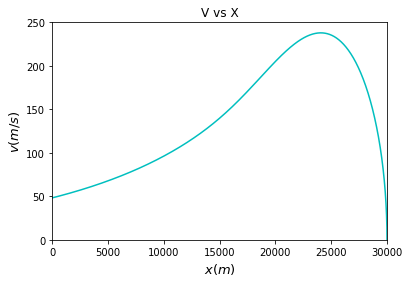

In [404]:
# Graficación
plt.plot(U_gm[:,0],-U_gm[:,1],'c-')
plt.title('V vs X')
plt.xlim(0,30000)
plt.ylim(0,250)
plt.xlabel('$x(m)$',size=13)
plt.ylabel('$v(m/s)$',size=13)
plt.show()

In [405]:
# Máximo de la velocidad
v_m = -U_gm[:,1].min()
v_m

237.93164606092483

In [406]:
# Cálculo de x_m

# Función que se usará
def f(xm,v_m=v_m,G=6.67e-11,M=5.98e+24,R=6.37e+6,ρ0=1.29,A=0.6,δ=0.8,m=72,λ=7482.2,g=9.8):
    k_0 = (ρ0*A*δ)/2
    return m*G*(M/(k_0*(R+xm)**2))*np.exp(xm/λ) - (v_m)**2

xm = np.linspace(0,300,10000) # Valores de la variable

In [407]:
# Valor de x_m
x_m = newton(f, 25000, tol = 1e-5)
x_m

24069.8110823312

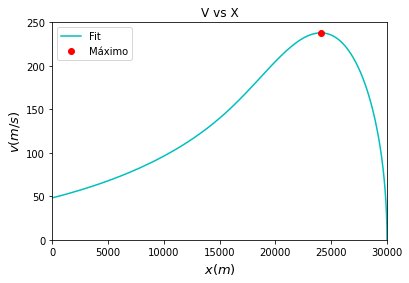

In [408]:
# Graficación
plt.plot(U_gm[:,0],-U_gm[:,1],'c-',label='Fit')
plt.plot(x_m,v_m,'ro',label='Máximo')
plt.title('V vs X')
plt.legend(loc="upper left")
plt.xlim(0,30000)
plt.ylim(0,250)
plt.xlabel('$x(m)$',size=13)
plt.ylabel('$v(m/s)$',size=13)
plt.show()

Por tanto, en el ejemplo anterior, la velocidad máxima se halló aproximadamente a $24069.81$ $m$ y dicha velocidad fue de alrededor de $237.93$ $m/s$.

## Referencias

[1] http://www.sc.ehu.es/sbweb/fisica/dinamica/paracaidista/paracaidista.html#Descenso%20de%20un%20paracaidista%20en%20una%20atm%C3%B3sfera%20no%20uniforme.

[2] https://www.grc.nasa.gov/www/k-12/rocket/atmosmet.html